<a href="https://colab.research.google.com/github/rafaelfeyh/iso-37120-municipios-br/blob/main/iso_37120_municipios_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Este material é parte integrante de artigo apresentado como requisito parcial para a obtenção do título de Especialista em Big Data, Data Science e Data Analytics, pelo curso de Pós-Graduação Lato Sensu em Big Data, Data Science e Data Analytics da Universidade do Vale do Rio dos Sinos – UNISINOS.

**Autor:** Rafael Feyh

**Artigo:** Análise da Prontidão e Aplicabilidade da NBR ISO 37120:2017 nos Municípios de Montenegro e Sapiranga

**Resumo:** 

**Ano:** 2020


---
# **Validação e Classificação**

###Bibliotecas

In [25]:
import pandas as pd
import numpy as np
import glob
from google.colab import files
from google.colab import drive

pd.options.display.float_format = '{:.2f}'.format

###Carregando CSVs a serem utilizados

In [26]:
# Opção que permite selecionar no computador quais arquivos serão utilizados,
# pode-se escolher mais de um.
# uploaded = files.upload()

In [27]:
# Opção que conecta diretamente ao seu Google Drive
# Conectando ao Google drive
drive.mount('/content/gdrive')
# Criando lista somente com os arquivos CSV.
arquivos_csv = [i for i in glob.glob('/content/gdrive/My Drive/dados_ISO/*.{}'.format('csv'))]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
print('----Lista de CSVs carregados -----------------')
for file in arquivos_csv:
    print('"{name}"'.format(name=file))
print('----------------------------------------------')

----Lista de CSVs carregados -----------------
"/content/gdrive/My Drive/dados_ISO/finbra-despesas-2019.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-receitas-2019.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-despesas-2018.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-despesas-2017.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-receitas-2017.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-receitas-2018.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-despesas-2016.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-receitas-2016.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-receitas-2015.csv"
"/content/gdrive/My Drive/dados_ISO/finbra-despesas-2015.csv"
"/content/gdrive/My Drive/dados_ISO/indicadores_iso.csv"
----------------------------------------------


###Validando e Classificando os datasets



Criando dataset para armazenar os CSVs válidos

In [29]:
df_csv = pd.DataFrame(columns=['ano', 'receitas', 'despesas'])
df_csv.head()

,ano,receitas,despesas


Validando lista de arquivos CSV

In [30]:
for file in arquivos_csv:

    # Extraindo as 3 primeiras linha para validação
    df_info = pd.read_csv(file, 
                          encoding='windows-1252', 
                          names=['coluna'], 
                          header=None, #header=3 pula as 3 primeiras linhas
                          nrows=3,
                          decimal=',')
    
    # Validando o CSV e extraindo informações das 3 primeiras linhas
    if df_info.iloc[0]['coluna'].startswith("Exerc"):
        line_1 = df_info.iloc[0]['coluna']
        line_3 = df_info.iloc[2]['coluna']
        ano = int(''.join(filter(str.isdigit, line_1)))
    else:
        continue #Pula para o próxima iteração do for
    
    # Validando o CSV se é do tipo Despesa
    if 'Despesas' in line_3:
        if ano not in df_csv.ano.values:
            df_csv = df_csv.append({'ano':ano, 'receitas':'a', 'despesas':file}, ignore_index=True)
            #print('d1')
        elif df_csv.loc[df_csv.ano == ano, 'despesas'].values == 'a':
            df_csv.loc[df_csv.ano == ano, 'despesas'] = file
            #print('d2')
        else:
            print('')
        print('despesas ' + str(ano))
    elif 'Receitas' in df_info.iloc[2]['coluna']:
        if ano not in df_csv.ano.values:
            df_csv = df_csv.append({'ano':ano, 'receitas':file, 'despesas':'a'}, ignore_index=True)
            #print('r1')
        elif df_csv.loc[df_csv.ano == ano, 'receitas'].values == 'a':
            df_csv.loc[df_csv.ano == ano, 'receitas'] = file
            #print('r2')
        else:
            print('')
        print('receitas ' + str(ano))

    print(file)

despesas 2019
/content/gdrive/My Drive/dados_ISO/finbra-despesas-2019.csv
receitas 2019
/content/gdrive/My Drive/dados_ISO/finbra-receitas-2019.csv
despesas 2018
/content/gdrive/My Drive/dados_ISO/finbra-despesas-2018.csv
despesas 2017
/content/gdrive/My Drive/dados_ISO/finbra-despesas-2017.csv
receitas 2017
/content/gdrive/My Drive/dados_ISO/finbra-receitas-2017.csv
receitas 2018
/content/gdrive/My Drive/dados_ISO/finbra-receitas-2018.csv
despesas 2016
/content/gdrive/My Drive/dados_ISO/finbra-despesas-2016.csv
receitas 2016
/content/gdrive/My Drive/dados_ISO/finbra-receitas-2016.csv
receitas 2015
/content/gdrive/My Drive/dados_ISO/finbra-receitas-2015.csv
despesas 2015
/content/gdrive/My Drive/dados_ISO/finbra-despesas-2015.csv


Listando os arquivos validados

In [31]:
df_csv.head(50)

,ano,receitas,despesas
0,2019,/content/gdrive/My Drive/dados_ISO/finbra-rece...,/content/gdrive/My Drive/dados_ISO/finbra-desp...
1,2018,/content/gdrive/My Drive/dados_ISO/finbra-rece...,/content/gdrive/My Drive/dados_ISO/finbra-desp...
2,2017,/content/gdrive/My Drive/dados_ISO/finbra-rece...,/content/gdrive/My Drive/dados_ISO/finbra-desp...
3,2016,/content/gdrive/My Drive/dados_ISO/finbra-rece...,/content/gdrive/My Drive/dados_ISO/finbra-desp...
4,2015,/content/gdrive/My Drive/dados_ISO/finbra-rece...,/content/gdrive/My Drive/dados_ISO/finbra-desp...


Outros testes e verificações

In [32]:
#df_csv.info()
#df_csv.dtypes

---
#**Extração e Preparação**

###Parametrização

In [33]:
# código IBGE do municúpios
cod_ibge                  = [4312401, #Montenegro
                             4319901] #Sapiranga
# Rubricas de Receitas
cod_conta                 = ['3.0.00.00.00', 
                             '4.0.00.00.00', 
                             '4.4.00.00.00', 
                             '4.6.00.00.00']
# Rubricas de Despesas, a partir de 2018
cod_conta_receitas_maior  = ['1.0.0.0.00.0.0', 
                             '1.1.1.0.00.0.0', 
                             '1.7.0.0.00.0.0', 
                             '2.0.0.0.00.0.0', 
                             '2.4.0.0.00.0.0', 
                             '7.0.0.0.00.0.0']
# Rubricas de Despesas, até 2017 (inclusive)
cod_conta_receitas_menor  = ['1.0.0.0.00.00.00', 
                             '1.1.1.0.00.00.00', 
                             '1.7.0.0.00.00.00', 
                             '2.0.0.0.00.00.00', 
                             '2.4.0.0.00.00.00', 
                             '7.0.0.0.00.00.00']

col_despesas              = ['municipio', 'cod_ibge', 'estado', 'populacao', 'tipo', 'conta', 'valor']
df_anos_despesas          = None
df_anos_receitas          = None
df_iso                    = None

###Execução

In [34]:
i  = 0
for ano in df_csv.ano:
    i = i + 1
    df_contas = None
    df_contas_receitas = None
    print(i)
    #df_ano = df_csv.loc[[df_csv['ano'] == ano]
    file_despesas = (df_csv.loc[df_csv.ano == ano, 'despesas']).values[0]
    file_receitas = (df_csv.loc[df_csv.ano == ano, 'receitas']).values[0]

    # ------------- Manipulando os arquivos de Despesas -------------
    print("Iteração {}: Extraindo Dados do arquivo {}".format(i, file_despesas))
    df_temp = pd.read_csv(file_despesas, 
                          encoding='windows-1252', 
                          sep=';', 
                          names=col_despesas, 
                          header=3, #header=3 pula as 3 primeiras linhas
                          decimal=',') 
    df_temp = pd.DataFrame(df_temp)
    # filtrando a coluna tipo(Coluna) por 'Pagas'
    df_temp = df_temp[df_temp['tipo'].str.contains('Pagas')]
    # Filtrando os municípios pelo código do IBGE
    df_temp = df_temp[df_temp['cod_ibge'].isin(cod_ibge)]
    # Filtrando a coluna conta para aparecer apenas a numeração
    df_temp['conta'] = df_temp['conta'].str[:12]
    # Filtrando a coluna municipio para aparecer apenas o nome do município
    df_temp['municipio'] = df_temp['municipio'].str[24:-4]
    # Filtrando as contas pelos códigos de conta utilizados
    df_temp = df_temp[df_temp['conta'].isin(cod_conta)]
    # Apagando as colunas desnecessárias
    df_temp.drop(['estado', 'populacao', 'tipo'], axis=1, inplace=True)
    # Criando coluna para cada conta
    for conta in cod_conta:
        df_aux_1 = (df_temp[df_temp['conta'].str.contains(conta)]).sort_values('municipio')
        df_aux_1 = pd.DataFrame(df_aux_1)
        if df_contas is None:
            #print("df_contas está vazia")
            df_aux_1.drop(['conta'], axis=1, inplace=True)
            df_aux_1.rename(columns={'valor':'desp_{}'.format(conta)}, inplace=True)
            df_aux_1['ano'] = ano
            df_aux_1 = df_aux_1.reindex(['ano', 'municipio', 'cod_ibge', 'desp_{}'.format(conta)], axis=1)
            df_contas = df_aux_1
        else:
            #print('passei aqui')
            df_aux_1.drop(['municipio', 'conta'], axis=1, inplace=True)
            df_aux_1.rename(columns={'valor':'desp_{}'.format(conta)}, inplace=True)
            df_contas = pd.merge(df_contas, df_aux_1, how='left', on='cod_ibge')
    # Juntando os arquivos(anos)
    if df_anos_despesas is None:
        #print('df_anos_despesas esta vazio')
        df_anos_despesas = df_contas
    else:
        #print('aqui')
        df_anos_despesas = pd.concat([df_anos_despesas, df_contas])

    # ------------- Manipulando os arquivos de Receitas -------------
    print("Iteração {}: Extraindo Dados do arquivo {}".format(i, file_receitas))
    df_temp = pd.read_csv(file_receitas, 
                          encoding='windows-1252', 
                          sep=';', 
                          names=col_despesas, 
                          header=3, #header=3 pula as 3 primeiras linhas
                          decimal=',')
    df_temp = pd.DataFrame(df_temp)
    # filtrando a coluna tipo(Coluna) por 'Pagas'
    df_temp = df_temp[df_temp['tipo'].str.contains('Receitas Brutas Realizadas')]
    # Filtrando os municípios pelo código do IBGE
    df_temp = df_temp[df_temp['cod_ibge'].isin(cod_ibge)]
    # Filtrando a coluna conta para aparecer apenas a numeração
    if ano > 2017:
        #print('o ano de {} é maior que 2017'.format(ano))
        df_temp['conta'] = df_temp['conta'].str[:14]
    else:
        #print('o ano de {} é menor ou igual a 2017'.format(ano))
        df_temp['conta'] = df_temp['conta'].str[:16]
    # Filtrando a coluna municipio para aparecer apenas o nome do município
    df_temp['municipio'] = df_temp['municipio'].str[24:-4]
    # Filtrando as contas pelos códigos de conta utilizados
    if ano > 2017:
        df_temp = df_temp[df_temp['conta'].isin(cod_conta_receitas_maior)]
    else:
        df_temp = df_temp[df_temp['conta'].isin(cod_conta_receitas_menor)]
    # Apagando as colunas desnecessárias
    df_temp.drop(['estado', 'populacao', 'tipo'], axis=1, inplace=True)
    # Criando coluna para cada conta
    contas = None
    if ano > 2017:
        contas = cod_conta_receitas_maior
    else:
        contas = cod_conta_receitas_menor
    for conta in contas:
        #print(conta)
        #print(cod_conta_receitas_maior[contas.index(conta)])
        #print(contas.index(conta))
        df_aux_1 = (df_temp[df_temp['conta'].str.contains(conta)]).sort_values('municipio')
        df_aux_1 = pd.DataFrame(df_aux_1)
        if df_contas_receitas is None:
            #print("df_contas_receitas está vazia")
            df_aux_1.drop(['conta'], axis=1, inplace=True)
            if ano > 2017:
                df_aux_1.rename(columns={'valor':'rec_{}'.format(conta)}, inplace=True)
                df_aux_1['ano'] = ano
                df_aux_1 = df_aux_1.reindex(['ano', 'municipio', 'cod_ibge', 'rec_{}'.format(conta)], axis=1)
            else:
                df_aux_1.rename(columns={'valor':'rec_{}'.format(cod_conta_receitas_maior[contas.index(conta)])}, inplace=True)
                df_aux_1['ano'] = ano
                df_aux_1 = df_aux_1.reindex(['ano', 'municipio', 'cod_ibge', 'rec_{}'.format(cod_conta_receitas_maior[contas.index(conta)])], axis=1)
            df_contas_receitas = df_aux_1
        else:
            #print('passei aqui')
            df_aux_1.drop(['municipio', 'conta'], axis=1, inplace=True)
            if ano > 2017:
                df_aux_1.rename(columns={'valor':'rec_{}'.format(conta)}, inplace=True)
            else:
                df_aux_1.rename(columns={'valor':'rec_{}'.format(cod_conta_receitas_maior[contas.index(conta)])}, inplace=True)
            df_contas_receitas = pd.merge(df_contas_receitas, df_aux_1, how='left', on='cod_ibge')
    # Juntando os arquivos(anos)
    if df_anos_receitas is None:
        #rint('df_anos_receitas esta vazio')
        df_anos_receitas = df_contas_receitas
    else:
        #print('aqui')
        df_anos_receitas = pd.concat([df_anos_receitas, df_contas_receitas])

# Juntando e limpando o dataset
df_anos_receitas.drop(['municipio'], axis=1, inplace=True)
df_iso = pd.merge(df_anos_despesas, df_anos_receitas, how='left', on=['cod_ibge', 'ano'])
df_iso.fillna(0, inplace=True)
# Ordenando o dataset por Município e Ano
df_iso.sort_values(['municipio', 'ano'], inplace=True, ignore_index=True)


1
Iteração 1: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-despesas-2019.csv
Iteração 1: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-receitas-2019.csv
2
Iteração 2: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-despesas-2018.csv
Iteração 2: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-receitas-2018.csv
3
Iteração 3: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-despesas-2017.csv
Iteração 3: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-receitas-2017.csv
4
Iteração 4: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-despesas-2016.csv
Iteração 4: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-receitas-2016.csv
5
Iteração 5: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-despesas-2015.csv
Iteração 5: Extraindo Dados do arquivo /content/gdrive/My Drive/dados_ISO/finbra-receitas-2015.csv


Listando dados extraídos e preparados



In [35]:
df_iso.head(50)

,ano,municipio,cod_ibge,desp_3.0.00.00.00,desp_4.0.00.00.00,desp_4.4.00.00.00,desp_4.6.00.00.00,rec_1.0.0.0.00.0.0,rec_1.1.1.0.00.0.0,rec_1.7.0.0.00.0.0,rec_2.0.0.0.00.0.0,rec_2.4.0.0.00.0.0,rec_7.0.0.0.00.0.0
0,2015,Montenegro,4312401,148367665.39,14956771.04,12043277.48,2913493.56,192232559.32,21697321.05,125515763.04,2990012.06,875889.52,17176861.95
1,2016,Montenegro,4312401,173900061.67,8860556.18,6239229.85,2621326.33,225368462.45,24159519.35,141200523.75,6357025.34,5874395.82,24292741.91
2,2017,Montenegro,4312401,182010520.68,3648223.28,1503073.24,2145150.04,229035120.32,27384233.21,145080080.69,1875961.29,1697574.38,27220458.39
3,2018,Montenegro,4312401,199510220.94,6380653.06,4231294.77,2149358.29,243247154.84,34784349.07,153991030.66,1529162.76,1030133.97,28506006.57
4,2019,Montenegro,4312401,218276915.80,9805838.24,7068969.05,2501871.32,293123838.10,39772388.33,165782226.50,3674879.48,819487.14,12839727.76
5,2015,Sapiranga,4319901,139860998.18,8887788.20,6892539.14,1985249.06,185312413.76,19108075.03,129000102.67,8499157.92,4321042.32,8576580.45
6,2016,Sapiranga,4319901,151107479.69,32038136.29,29020634.09,3010375.20,213219122.74,21661101.31,141519695.16,30510830.98,11525815.97,8849920.67
7,2017,Sapiranga,4319901,165635407.80,19980410.44,16498896.60,3481513.84,218839748.87,24147780.13,148754131.10,12310960.80,8086396.24,11086803.19
8,2018,Sapiranga,4319901,177144567.88,13991509.66,9619876.78,4109844.04,214339766.61,29542250.21,164290134.28,12537368.23,7003682.10,12286543.44
9,2019,Sapiranga,4319901,191762476.20,20131917.87,15567112.24,4559805.63,229297799.30,34753430.70,172499322.40,13768309.52,7121983.45,14168361.02


Outros testes e verificações

In [36]:
#df_iso.head(50)
#df_anos_despesas.head(50)
#df_anos_receitas.head(50)
#df_iso.dtypes

---
#**Calculando os Indicadores**

###Cálculos

In [37]:
# Para recalcular os indicadores
#df_iso.drop(['ind_9_1', 'ind_9_2','ind_9_3'], axis=1, inplace=True)

In [38]:
df_iso['ind_9_1'] = (df_iso['desp_4.6.00.00.00']) / (df_iso['rec_1.0.0.0.00.0.0'] +
                                                     df_iso['rec_2.0.0.0.00.0.0'] +
                                                     df_iso['rec_7.0.0.0.00.0.0'] -
                                                     df_iso['rec_1.7.0.0.00.0.0'] -
                                                     df_iso['rec_2.4.0.0.00.0.0']) * 100

df_iso['ind_9_2'] = (df_iso['desp_4.4.00.00.00']) / (df_iso['desp_3.0.00.00.00'] +
                                                     df_iso['desp_4.0.00.00.00']) * 100                              


df_iso['ind_9_3'] = (df_iso['rec_1.0.0.0.00.0.0'] +
                     df_iso['rec_2.0.0.0.00.0.0'] +
                     df_iso['rec_7.0.0.0.00.0.0'] -
                     df_iso['rec_1.7.0.0.00.0.0'] -
                     df_iso['rec_2.4.0.0.00.0.0']) / (df_iso['rec_1.0.0.0.00.0.0'] +
                                                      df_iso['rec_2.0.0.0.00.0.0'] +
                                                      df_iso['rec_7.0.0.0.00.0.0']) * 100



In [39]:
df_iso.head()

,ano,municipio,cod_ibge,desp_3.0.00.00.00,desp_4.0.00.00.00,desp_4.4.00.00.00,desp_4.6.00.00.00,rec_1.0.0.0.00.0.0,rec_1.1.1.0.00.0.0,rec_1.7.0.0.00.0.0,rec_2.0.0.0.00.0.0,rec_2.4.0.0.00.0.0,rec_7.0.0.0.00.0.0,ind_9_1,ind_9_2,ind_9_3
0,2015,Montenegro,4312401,148367665.39,14956771.04,12043277.48,2913493.56,192232559.32,21697321.05,125515763.04,2990012.06,875889.52,17176861.95,3.39,7.37,40.49
1,2016,Montenegro,4312401,173900061.67,8860556.18,6239229.85,2621326.33,225368462.45,24159519.35,141200523.75,6357025.34,5874395.82,24292741.91,2.41,3.41,42.55
2,2017,Montenegro,4312401,182010520.68,3648223.28,1503073.24,2145150.04,229035120.32,27384233.21,145080080.69,1875961.29,1697574.38,27220458.39,1.93,0.81,43.14
3,2018,Montenegro,4312401,199510220.94,6380653.06,4231294.77,2149358.29,243247154.84,34784349.07,153991030.66,1529162.76,1030133.97,28506006.57,1.82,2.06,43.27
4,2019,Montenegro,4312401,218276915.80,9805838.24,7068969.05,2501871.32,293123838.10,39772388.33,165782226.50,3674879.48,819487.14,12839727.76,1.75,3.10,46.19


In [40]:
df_iso_ind = (df_iso[['ano', 'municipio', 'ind_9_1', 'ind_9_2', 'ind_9_3']]).sort_values(['municipio', 'ano'])
df_iso_ind.head()

,ano,municipio,ind_9_1,ind_9_2,ind_9_3
0,2015,Montenegro,3.39,7.37,40.49
1,2016,Montenegro,2.41,3.41,42.55
2,2017,Montenegro,1.93,0.81,43.14
3,2018,Montenegro,1.82,2.06,43.27
4,2019,Montenegro,1.75,3.10,46.19


In [41]:
# Gerando arquivo CVS para utilização no Power BI
df_iso_ind.to_csv ('/content/gdrive/My Drive/dados_ISO/indicadores_iso.csv', sep=";", index=False, decimal=',')

###Gráfico - Indicador 9.1

In [42]:
df_mont = df_iso[df_iso.municipio.str.contains('Montenegro')]
df_mont = df_mont[['ano', 'ind_9_1']]
df_mont.rename(columns={'ind_9_1':'Montenegro'}, inplace=True)

df_sap  = df_iso[df_iso.municipio.str.contains('Sapiranga')]
df_sap = df_sap[['ano', 'ind_9_1']]
df_sap.rename(columns={'ind_9_1':'Sapiranga'}, inplace=True)

df_ind = pd.merge(df_mont, df_sap, how='left', on='ano')

df_ind.head()


,ano,Montenegro,Sapiranga
0,2015,3.39,2.87
1,2016,2.41,3.02
2,2017,1.93,4.08
3,2018,1.82,6.06
4,2019,1.75,5.88


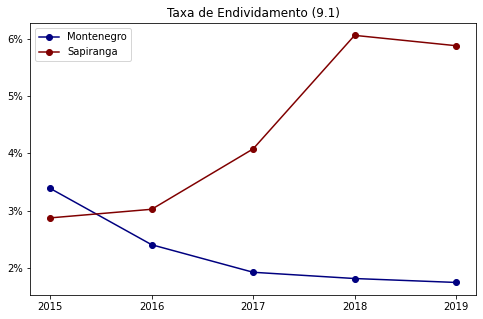

In [43]:
ax = df_ind.plot(x='ano',
                 y=['Montenegro', 'Sapiranga'],
                 title='Taxa de Endividamento (9.1)',
                 colormap='jet',
                 marker='o',
                 xticks=df_mont.ano.values,
                 figsize=(8, 5) )
ax.set(yticklabels=['{:.0f}%'.format(x) for x in ax.get_yticks()], 
       xlabel=None)
ax.get_figure().savefig('/content/gdrive/My Drive/dados_ISO/grafico_ind_9_1.png', 
                        dpi=300,
                        bbox_inches='tight')

###Gráfico - Indicador 9.2

In [44]:
df_mont = df_iso[df_iso.municipio.str.contains('Montenegro')]
df_mont = df_mont[['ano', 'ind_9_2']]
df_mont.rename(columns={'ind_9_2':'Montenegro'}, inplace=True)

df_sap  = df_iso[df_iso.municipio.str.contains('Sapiranga')]
df_sap = df_sap[['ano', 'ind_9_2']]
df_sap.rename(columns={'ind_9_2':'Sapiranga'}, inplace=True)

df_ind = pd.merge(df_mont, df_sap, how='left', on='ano')

df_ind.head()

,ano,Montenegro,Sapiranga
0,2015,7.37,4.63
1,2016,3.41,15.85
2,2017,0.81,8.89
3,2018,2.06,5.03
4,2019,3.10,7.35


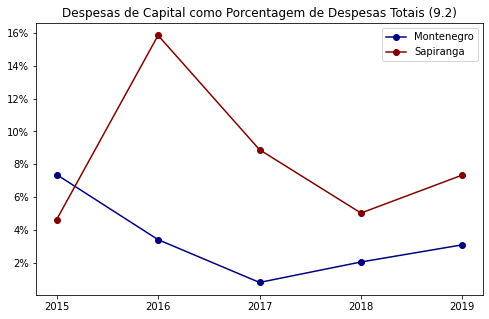

In [45]:
ax = df_ind.plot(x='ano',
                 y=['Montenegro', 'Sapiranga'],
                 title='Despesas de Capital como Porcentagem de Despesas Totais (9.2)',
                 colormap='jet',
                 marker='o',
                 xticks=df_mont.ano.values,
                 figsize=(8, 5) )
ax.set(yticklabels=['{:.0f}%'.format(x) for x in ax.get_yticks()], 
       xlabel=None)
ax.get_figure().savefig('/content/gdrive/My Drive/dados_ISO/grafico_ind_9_2.png', 
                        dpi=300,
                        bbox_inches='tight')

###Gráfico - Indicador 9.3

In [46]:
df_mont = df_iso[df_iso.municipio.str.contains('Montenegro')]
df_mont = df_mont[['ano', 'ind_9_3']]
df_mont.rename(columns={'ind_9_3':'Montenegro'}, inplace=True)

df_sap  = df_iso[df_iso.municipio.str.contains('Sapiranga')]
df_sap = df_sap[['ano', 'ind_9_3']]
df_sap.rename(columns={'ind_9_3':'Sapiranga'}, inplace=True)

df_ind = pd.merge(df_mont, df_sap, how='left', on='ano')

df_ind.head()

,ano,Montenegro,Sapiranga
0,2015,40.49,34.13
1,2016,42.55,39.41
2,2017,43.14,35.25
3,2018,43.27,28.38
4,2019,46.19,30.17


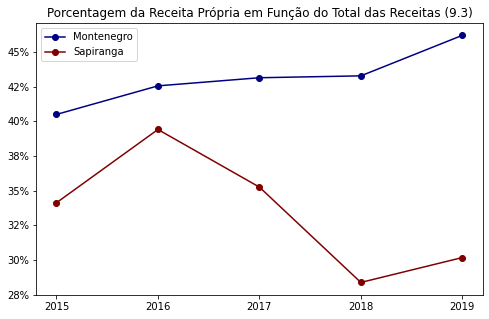

In [47]:
ax = df_ind.plot(x='ano',
                 y=['Montenegro', 'Sapiranga'],
                 title='Porcentagem da Receita Própria em Função do Total das Receitas (9.3)',
                 colormap='jet',
                 marker='o',
                 xticks=df_mont.ano.values,
                 figsize=(8, 5) )
ax.set(yticklabels=['{:.0f}%'.format(x) for x in ax.get_yticks()], 
       xlabel=None)
ax.get_figure().savefig('/content/gdrive/My Drive/dados_ISO/grafico_ind_9_3.png', 
                        dpi=300,
                        bbox_inches='tight')